# Monte Carlo Simulations

## Introduction

Monte Carlo simulations are useful approximations when solving a mathematical problem analytically is impractical or impossible. 


## Objectives

You will be able to:

* Understand and conduct Monte Carlo simulations

Due to the increasing availability and affordability of powerful computational engines (computers), Monte Carlo simulations have become an increasingly popular tool for conducting statistical testing.

## Area of a Circle

A common naive example of Monte Carlo simulations is estimating the area of irregular geometrical figures that may be difficult to compute using standard analytic geometric methods. An easy example to start with is estimating the area of a circle using simulation.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

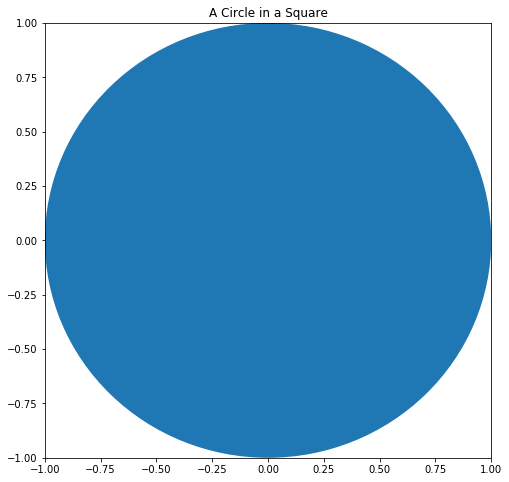

In [2]:
fig = plt.figure(figsize=(8,8))
axis = fig.add_subplot(1,1,1)
circle = plt.Circle((0,0), 1)
axis.add_patch(circle)
axis.set_xlim([-1,1])
axis.set_ylim([-1,1])
axis.set_title('A Circle in a Square')
plt.show()

Now in this case, we know that the area of a circle is given by:    
$A = \pi \bullet r^2$  
and substituting in our radius we have:  
$A = \pi \bullet 1^2$  
$A = \pi$  

Here's how we could come to a similar conclusion using a Monte Carlo simulation:

In [3]:
import numpy as np

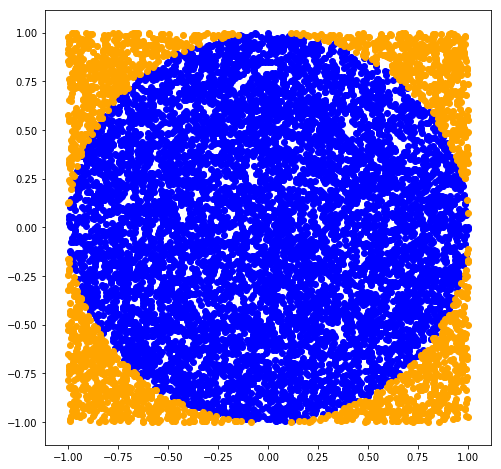

In [5]:
#1 Generate random points
n_points = 10**4
# assume equal probability for anywhere in square 
x = np.random.uniform(low=-1, high=1, size=n_points)
y = np.random.uniform(low=-1, high=1, size=n_points)

inside = {'x':[], 'y':[]}
outside = {'x':[], 'y':[]}

#2 Determine if the point is inside or outside our circle
count = 0
for x, y in list(zip(x,y)):
    if x**2 + y**2 <= 1:
        count += 1
        inside['x'] = inside['x'] + [x]
        inside['y'] = inside['y'] + [y]
    else:
        outside['x'] = outside['x']  + [x]
        outside['y'] = outside['y']  + [y]
    
#3 Use these sample points to estimate our circle area
plt.figure(figsize=(8,8))
plt.scatter(inside['x'], inside['y'], c='blue')
plt.scatter(outside['x'], outside['y'], c='orange')
plt.show()

In [8]:
count/n_points*2**2

3.1512

We know that we generate 10,000 points and that the area of the larger square should be 2*2=4 units.

In [5]:
n_inside = len(inside['x'])
n_outside = len(outside['x'])
frac_inside = n_inside / (n_outside + n_inside)
total_area = 4
area_inside = frac_inside * total_area
print(area_inside)

3.1312


Not the best simulation of pi, but we can easily turn up our number of simulations to improve the estimate:

In [1]:
n_points = 10**5
x = np.random.uniform(low=-1, high=1, size=n_points)
y = np.random.uniform(low=-1, high=1, size=n_points)

inside = {'x':[], 'y':[]}
outside = {'x':[], 'y':[]}

#2 Determine if the point is inside or outside our circle
count = 0
for x, y in list(zip(x,y)):
    if x**2 + y**2 <= 1:
        count += 1
        inside['x'] = inside['x'] + [x]
        inside['y'] = inside['y'] + [y]
    else:
        outside['x'] = outside['x']  + [x]
        outside['y'] = outside['y']  + [y]
    
#3 Use these sample points to estimate our circle area
plt.figure(figsize=(8,8))
plt.scatter(inside['x'], inside['y'], c='blue')
plt.scatter(outside['x'], outside['y'], c='orange')
plt.show()

n_inside = len(inside['x'])
n_outside = len(outside['x'])
frac_inside = n_inside / (n_outside + n_inside)
total_area = 4
area_inside = frac_inside * total_area
print(area_inside)

NameError: name 'np' is not defined

## Permutation Tests and Exploding Combination Sizes

When conducting permutation tests, the size of potential combination sizes quickly explodes as our original sample sizes grow. As a result, even with modern computers, it is often infeasible or egregiously resource-expensive to attempt to generate these permutation spaces. To cope with this, monte carlo simulations are often used in practice in order to simulate samples from the permutation space. In the upcoming lab, you'll do just that!

## Additional Resources

* http://mathworld.wolfram.com/MonteCarloMethod.html
* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2924739/

## Summary

In this lesson, we investigated Monte Carlo simulations starting with a simple example of estimating the area of a circle. We also briefly discussed simulations role in permutation testing. In the upcoming labs, you'll put some of these concepts to practice, using Monte Carlo to estimate a permutation test on a larger sample. 